In [1]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
#Load Data and review content
root_cause_data = pd.read_csv("root_cause_analysis.csv")

print("\nLoaded Data :\n------------------------------------")
print(root_cause_data.head())



Loaded Data :
------------------------------------
   ID  CPU_LOAD  MEMORY_LEAK_LOAD  DELAY  ERROR_1000  ERROR_1001  ERROR_1002  \
0   1         0                 0      0           0           1           0   
1   2         0                 0      0           0           0           0   
2   3         0                 1      1           0           0           1   
3   4         0                 1      0           1           1           0   
4   5         1                 1      0           1           0           1   

   ERROR_1003     ROOT_CAUSE  
0           1    MEMORY_LEAK  
1           1    MEMORY_LEAK  
2           1    MEMORY_LEAK  
3           1    MEMORY_LEAK  
4           0  NETWORK_DELAY  


In [6]:
#Use a Label encoder to convert String to numeric values 
#for the target variable

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
root_cause_data['ROOT_CAUSE'] = label_encoder.fit_transform(
                                root_cause_data['ROOT_CAUSE'])

In [7]:
print("\nLoaded Data :\n------------------------------------")
print(root_cause_data.head())


Loaded Data :
------------------------------------
   ID  CPU_LOAD  MEMORY_LEAK_LOAD  DELAY  ERROR_1000  ERROR_1001  ERROR_1002  \
0   1         0                 0      0           0           1           0   
1   2         0                 0      0           0           0           0   
2   3         0                 1      1           0           0           1   
3   4         0                 1      0           1           1           0   
4   5         1                 1      0           1           0           1   

   ERROR_1003  ROOT_CAUSE  
0           1           1  
1           1           1  
2           1           1  
3           1           1  
4           0           2  


In [12]:
#Convert input to numpy array
np_data = root_cause_data.to_numpy()

#Separate feature and target variables
X_data = np_data[:,1:8]
Y_data=np_data[:,8]

print("\nFeatures before scaling :\n------------------------------------")
print(X_data[:5,:])
print("\nTarget before scaling :\n------------------------------------")
print(Y_data[:5])

#Create a scaler model that is fit on the input data.
scaler = StandardScaler().fit(X_data)

#Scale the numeric feature variables
X_data = scaler.transform(X_data)

#Convert target variable as a one-hot-encoding array
Y_data = tf.keras.utils.to_categorical(Y_data,3)

print("\nFeatures after scaling :\n------------------------------------")
print(X_data[:5,:])
print("\nTarget after one-hot-encoding :\n------------------------------------")
print(Y_data[:5,:])

#Split training and test data
X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.10)

print("\nTrain Test Dimensions:\n------------------------------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


Features before scaling :
------------------------------------
[[0 0 0 0 1 0 1]
 [0 0 0 0 0 0 1]
 [0 1 1 0 0 1 1]
 [0 1 0 1 1 0 1]
 [1 1 0 1 0 1 0]]

Target before scaling :
------------------------------------
[1 1 1 1 2]

Features after scaling :
------------------------------------
[[-0.94548368 -0.84747452 -0.80632811 -0.80801767  1.03046381 -0.87210285
   1.27462619]
 [-0.94548368 -0.84747452 -0.80632811 -0.80801767 -0.97043679 -0.87210285
   1.27462619]
 [-0.94548368  1.17997648  1.24018993 -0.80801767 -0.97043679  1.14665375
   1.27462619]
 [-0.94548368  1.17997648 -0.80632811  1.23759669  1.03046381 -0.87210285
   1.27462619]
 [ 1.05765971  1.17997648 -0.80632811  1.23759669 -0.97043679  1.14665375
  -0.78454374]]

Target after one-hot-encoding :
------------------------------------
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Train Test Dimensions:
------------------------------------
(900, 7) (900, 3) (100, 7) (100, 3)


In [14]:
from tensorflow import keras

#Number of classes in the target variable
NB_CLASSES=3

#Create a sequencial model in Keras
model = tf.keras.models.Sequential()

#Add the first hidden layer
model.add(keras.layers.Dense(128,                    #Number of nodes
                             input_shape=(7,),       #Number of input variables
                              name='Hidden_Layer_1', #Logical name
                              activation='relu'))    #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden_Layer_2',
                              activation='relu'))

#Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output_Layer',
                             activation='softmax'))

#Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

#Print the model meta-data
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 128)               1024      
                                                                 
 Hidden_Layer_2 (Dense)      (None, 128)               16512     
                                                                 
 Output_Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17923 (70.01 KB)
Trainable params: 17923 (70.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



Training Progress:
------------------------------------
Epoch 1/10
45/45 [==============================] - 1s 5ms/step - loss: 0.6136 - accuracy: 0.7833 - val_loss: 0.4429 - val_accuracy: 0.8611
Epoch 2/10
45/45 [==============================] - 0s 2ms/step - loss: 0.4464 - accuracy: 0.8278 - val_loss: 0.4439 - val_accuracy: 0.8222
Epoch 3/10
45/45 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.8458 - val_loss: 0.4182 - val_accuracy: 0.8444
Epoch 4/10
45/45 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8542 - val_loss: 0.3987 - val_accuracy: 0.8500
Epoch 5/10
45/45 [==============================] - 0s 2ms/step - loss: 0.3849 - accuracy: 0.8569 - val_loss: 0.3932 - val_accuracy: 0.8444
Epoch 6/10
45/45 [==============================] - 0s 1ms/step - loss: 0.3701 - accuracy: 0.8583 - val_loss: 0.3834 - val_accuracy: 0.8500
Epoch 7/10
45/45 [==============================] - 0s 2ms/step - loss: 0.3641 - accuracy: 0.8667 - val

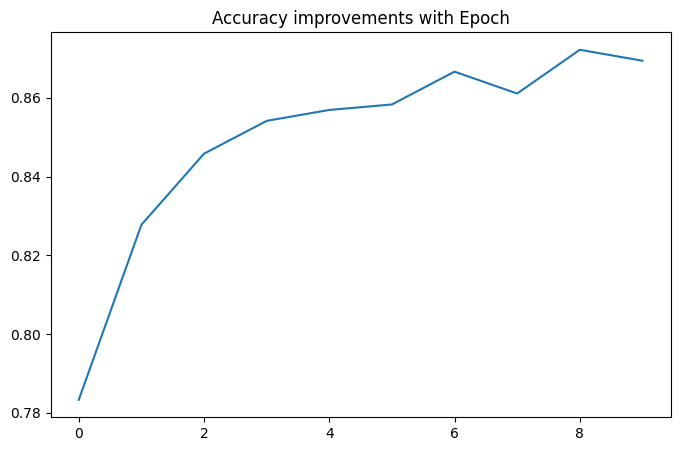


Evaluation against Test Dataset :
------------------------------------
4/4 [==============================] - 0s 2ms/step - loss: 0.4421 - accuracy: 0.8000


[0.4421007037162781, 0.800000011920929]

In [15]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=16
#Set number of epochs
EPOCHS=10
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)